In [1]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.4/819.4 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 25.8 MB/s eta 0:00:00


Keras 和 Dense Neural Network (DNN)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7795 - loss: 0.7017 - val_accuracy: 0.9529 - val_loss: 0.1633 - learning_rate: 0.0010
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9337 - loss: 0.2241 - val_accuracy: 0.9618 - val_loss: 0.1264 - learning_rate: 0.0010
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9487 - loss: 0.1706 - val_accuracy: 0.9687 - val_loss: 0.1065 - learning_rate: 0.0010
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9573 - loss: 0.1454 - val_accuracy: 0.9717 - val_loss: 0.0950 - learning_rate: 0.0010
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9594 - loss: 0.1340 - val_accuracy: 0.9722 - val_loss: 0.0943 - learning_rate: 0.0010
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9676 - loss: 0.1066 - val_accuracy: 0.9750 - val_loss: 0.0891 - learning_rate: 5.0000e-04
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9716

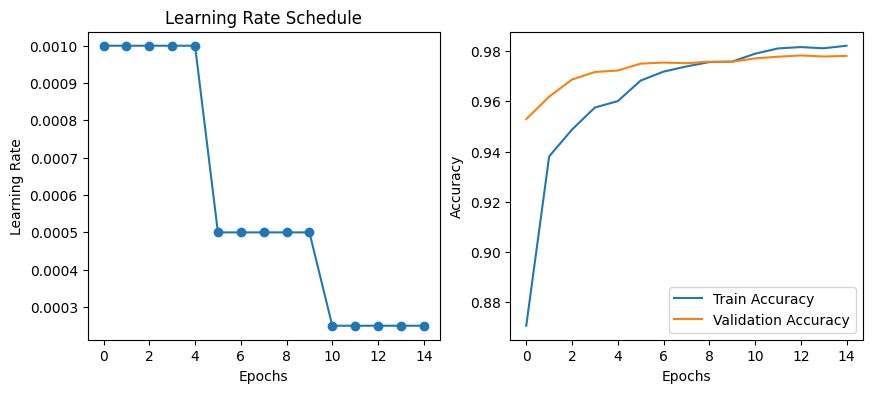

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# 1. 資料理解與準備
# 載入資料集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 資料預處理
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. 定義 Learning Rate Schedule
def lr_schedule(epoch):
    """根據 epoch 動態調整學習率"""
    initial_lr = 0.001
    drop_rate = 0.5
    epoch_drop = 5
    return initial_lr * (drop_rate ** (epoch // epoch_drop))

# Callback for learning rate scheduling
lr_callback = LearningRateScheduler(lr_schedule)

# 3. 建模
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),  # 加入 Dropout 避免過擬合
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[lr_callback])  # 加入學習率排程

# 4. 評估
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# 視覺化學習率
learning_rates = [lr_schedule(epoch) for epoch in range(15)]
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(learning_rates, marker='o')
plt.title("Learning Rate Schedule")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")

# 視覺化準確率
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 5. 儲存模型
model.save('mnist_dense_with_dropout_and_lr.h5')


Pytorch 和 Dense Neural Network (DNN)

Using device: cuda
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 487kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.47MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/15], Loss: 0.5221, Train Accuracy: 0.8383, Validation Accuracy: 0.9309, LR: 0.001000
Epoch [2/15], Loss: 0.3170, Train Accuracy: 0.9052, Validation Accuracy: 0.9427, LR: 0.001000
Epoch [3/15], Loss: 0.2709, Train Accuracy: 0.9186, Validation Accuracy: 0.9547, LR: 0.001000
Epoch [4/15], Loss: 0.2495, Train Accuracy: 0.9257, Validation Accuracy: 0.9570, LR: 0.001000
Epoch [5/15], Loss: 0.2300, Train Accuracy: 0.9308, Validation Accuracy: 0.9569, LR: 0.001000
Epoch [6/15], Loss: 0.2185, Train Accuracy: 0.9339, Validation Accuracy: 0.9600, LR: 0.000500
Epoch [7/15], Loss: 0.1777, Train Accuracy: 0.9469, Validation Accuracy: 0.9679, LR: 0.000500
Epoch [8/15], Loss: 0.1721, Train Accuracy: 0.9491, Validation Accuracy: 0.9682, LR: 0.000500
Epoch [9/15], Loss: 0.1680, Train Accuracy: 0.9491, Validation Accuracy: 0.9699, LR: 0.000500
Epoch [10/15], Loss: 0.1590, Train Accuracy: 0.9516, Validation Accuracy: 0.967

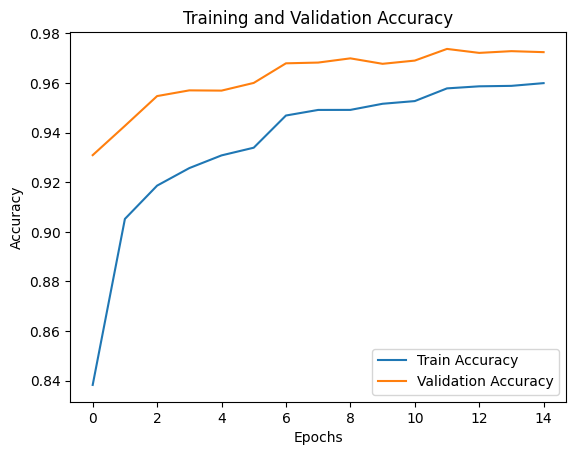

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 檢查 CUDA 是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. 資料理解與準備
# MNIST 資料集下載與預處理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 2. 建模
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

model = DNN().to(device)

# 3. 定義損失函數與優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning Rate Schedule
def adjust_learning_rate(optimizer, epoch):
    initial_lr = 0.001
    drop_rate = 0.5
    epoch_drop = 5
    lr = initial_lr * (drop_rate ** (epoch // epoch_drop))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return lr

# 4. 訓練模型
num_epochs = 15
train_acc_history, val_acc_history = [], []

for epoch in range(num_epochs):
    model.train()
    correct, total = 0, 0
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    train_acc = correct / total
    train_acc_history.append(train_acc)

    # 調整學習率
    current_lr = adjust_learning_rate(optimizer, epoch)

    # 驗證模型
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = correct / total
    val_acc_history.append(val_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, "
          f"Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}, LR: {current_lr:.6f}")

# 5. 評估模型
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print(f"Test Accuracy: {test_acc:.4f}")

# 6. 可視化結果
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

# 儲存模型
torch.save(model.state_dict(), 'mnist_dnn_with_dropout_and_lr.pth')


pytroch CNN

In [4]:
!pip install matplotlib opencv-python torchcam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00


In [5]:
!pip install torchcam  # Use a version number where draw_cam was present.

Using device: cuda
Epoch [1/15], Loss: 0.2977, Train Accuracy: 0.9076, Validation Accuracy: 0.9838, LR: 0.001000
Epoch [2/15], Loss: 0.0836, Train Accuracy: 0.9777, Validation Accuracy: 0.9877, LR: 0.001000
Epoch [3/15], Loss: 0.0619, Train Accuracy: 0.9836, Validation Accuracy: 0.9878, LR: 0.001000
Epoch [4/15], Loss: 0.0499, Train Accuracy: 0.9865, Validation Accuracy: 0.9907, LR: 0.001000
Epoch [5/15], Loss: 0.0402, Train Accuracy: 0.9890, Validation Accuracy: 0.9915, LR: 0.001000
Epoch [6/15], Loss: 0.0385, Train Accuracy: 0.9899, Validation Accuracy: 0.9918, LR: 0.000500
Epoch [7/15], Loss: 0.0204, Train Accuracy: 0.9945, Validation Accuracy: 0.9932, LR: 0.000500
Epoch [8/15], Loss: 0.0153, Train Accuracy: 0.9956, Validation Accuracy: 0.9928, LR: 0.000500
Epoch [9/15], Loss: 0.0134, Train Accuracy: 0.9960, Validation Accuracy: 0.9936, LR: 0.000500
Epoch [10/15], Loss: 0.0119, Train Accuracy: 0.9968, Validation Accuracy: 0.9915, LR: 0.000500
Epoch [11/15], Loss: 0.0106, Train Accur

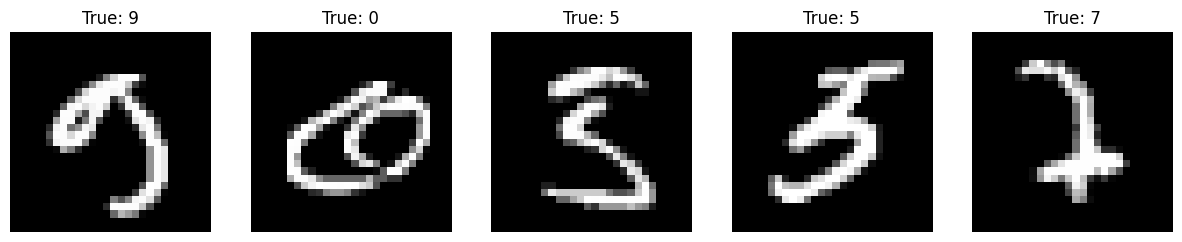

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# 檢查 CUDA 是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. 資料理解與準備
# MNIST 資料集下載與預處理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 2. 建模
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 卷積層
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # 池化層
        self.fc1 = nn.Linear(128 * 3 * 3, 128)  # 根據新的尺寸調整全連接層的輸入維度
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 10)  # 輸出 10 類別

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # 第一層卷積 + ReLU + 池化
        x = self.pool(torch.relu(self.conv2(x)))  # 第二層卷積 + ReLU + 池化
        x = self.pool(torch.relu(self.conv3(x)))  # 第三層卷積 + ReLU + 池化

        x = x.view(-1, 128 * 3 * 3)  # 根據池化後的尺寸展平
        x = torch.relu(self.fc1(x))  # 全連接層 + ReLU
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))  # 第二個全連接層 + ReLU
        x = self.dropout2(x)
        x = self.fc3(x)  # 最後的全連接層，輸出 10 類別
        return x

model = CNN().to(device)

# 3. 定義損失函數與優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning Rate Schedule
def adjust_learning_rate(optimizer, epoch):
    initial_lr = 0.001
    drop_rate = 0.5
    epoch_drop = 5
    lr = initial_lr * (drop_rate ** (epoch // epoch_drop))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return lr

# 4. 訓練模型
num_epochs = 15
train_acc_history, val_acc_history = [], []

for epoch in range(num_epochs):
    model.train()
    correct, total = 0, 0
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    train_acc = correct / total
    train_acc_history.append(train_acc)

    # 調整學習率
    current_lr = adjust_learning_rate(optimizer, epoch)

    # 驗證模型
    model.eval()
    correct, total = 0, 0
    incorrect_images = []  # 用來儲存分類錯誤的圖像
    incorrect_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # 儲存分類錯誤的圖片
            incorrect = (predicted != labels)
            incorrect_images.append(images[incorrect])
            incorrect_labels.append(labels[incorrect])

    val_acc = correct / total
    val_acc_history.append(val_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, "
          f"Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}, LR: {current_lr:.6f}")

# 5. 評估模型
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print(f"Test Accuracy: {test_acc:.4f}")

# 6. 顯示5張分類錯誤的圖片
incorrect_images = torch.cat(incorrect_images)  # 合併錯誤的圖片
incorrect_labels = torch.cat(incorrect_labels)  # 合併錯誤的標籤

# 隨機選取5張錯誤分類的圖片
indices = np.random.choice(len(incorrect_images), 5, replace=False)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, idx in enumerate(indices):
    ax = axes[i]
    ax.imshow(incorrect_images[idx].cpu().numpy().squeeze(), cmap='gray')
    ax.set_title(f"True: {incorrect_labels[idx].item()}")
    ax.axis('off')

plt.show()

# 儲存模型
torch.save(model.state_dict(), 'mnist_cnn_with_dropout_and_lr.pth')


CNN tensorflow

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8353 - loss: 0.4993 - val_accuracy: 0.9890 - val_loss: 0.0362 - learning_rate: 0.0010
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9802 - loss: 0.0731 - val_accuracy: 0.9914 - val_loss: 0.0259 - learning_rate: 0.0010
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9874 - loss: 0.0470 - val_accuracy: 0.9922 - val_loss: 0.0295 - learning_rate: 0.0010
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9891 - loss: 0.0385 - val_accuracy: 0.9924 - val_loss: 0.0243 - learning_rate: 0.0010
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9914 - loss: 0.0328 - val_accuracy: 0.9925 - val_loss: 0.0254 - learning_rate: 0.0010
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9952 - loss: 0.0188 - val_accuracy: 0.9933 - val_loss: 0.0259 - learning_rate: 5.0000e-04
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 

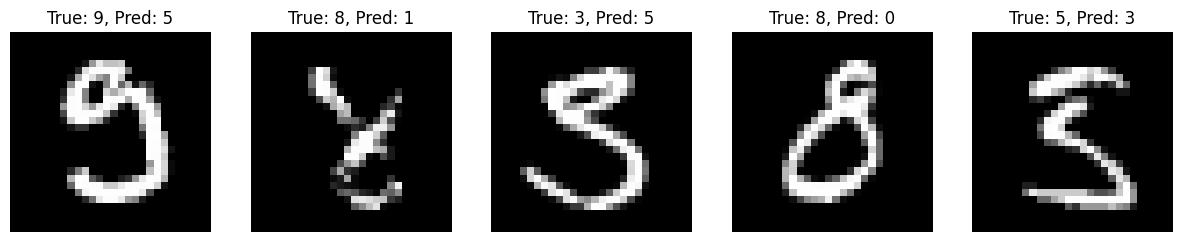

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np

# 1. 資料理解與準備
# 加載 MNIST 數據集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 將影像數據標準化到 [0, 1] 並重新調整維度以符合 CNN 輸入格式 (批次大小, 高度, 寬度, 通道)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# 將標籤進行 one-hot 編碼
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# 2. 建立 CNN 模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])

# 3. 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 定義學習率調整函數
def lr_scheduler(epoch, lr):
    initial_lr = 0.001
    drop_rate = 0.5
    epoch_drop = 5
    lr = initial_lr * (drop_rate ** (epoch // epoch_drop))
    return lr

# 5. 訓練模型
lr_callback = LearningRateScheduler(lr_scheduler)

history = model.fit(train_images, train_labels, epochs=15, batch_size=32,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_callback])

# 6. 評估模型
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# 7. 顯示5張分類錯誤的圖片並顯示預測與真實類別
predictions = model.predict(test_images)
incorrect_indices = np.where(np.argmax(predictions, axis=1) != np.argmax(test_labels, axis=1))[0]

# 隨機選取5張錯誤分類的圖片
incorrect_indices = np.random.choice(incorrect_indices, 5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, idx in enumerate(incorrect_indices):
    ax = axes[i]
    ax.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    true_label = np.argmax(test_labels[idx])
    pred_label = np.argmax(predictions[idx])
    ax.set_title(f"True: {true_label}, Pred: {pred_label}")
    ax.axis('off')

plt.show()

# 8. 儲存模型
model.save('mnist_cnn_with_dropout_and_lr_tf.keras.h5')
